In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import utils

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
EMBEDDING_DIM = 16
NUM_EPOCHS = 10

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
tokenizer = info.features['text'].encoder

In [4]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
val_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
def build_model_lstm_1():
    model = keras.Sequential([
        keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
        keras.layers.Bidirectional(keras.layers.LSTM(64)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_model_lstm_2():
    model = keras.Sequential([
        keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
        keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(32)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_model_gru():
    model = keras.Sequential([
        keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
        keras.layers.Bidirectional(keras.layers.GRU(32)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def build_model_conv1d():
    model = keras.Sequential([
        keras.layers.Embedding(tokenizer.vocab_size, EMBEDDING_DIM),
        keras.layers.Conv1D(128, 5, activation='relu'),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
model_lstm_1 = build_model_lstm_1()
model_lstm_1.summary()
history_lstm_1 = model_lstm_1.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=val_dataset)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 180,753
Trainable params: 180,753
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 55s 141ms/step - loss: 0.5262 - accuracy: 0.7243 - val_loss: 0.4857 - val_accuracy: 0.7732
Epoch 2/10
391/391 [==============================] - 54s 139ms/step - loss: 0.3635 - accuracy: 0.8515 

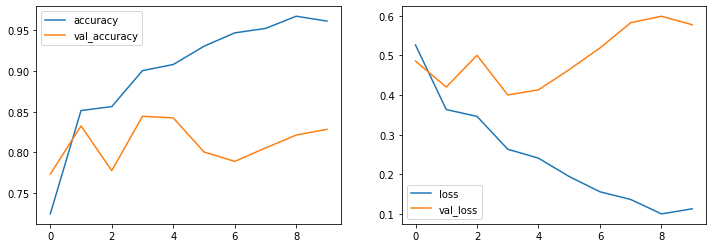

In [7]:
utils.plot_history(history_lstm_1)

In [8]:
model_lstm_2 = build_model_lstm_2()
model_lstm_2.summary()
history_lstm_2 = model_lstm_2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=val_dataset)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         41472     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 217,873
Trainable params: 217,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 103s 263ms/step - loss: 0.6651 - accuracy: 0.5792 - val_loss

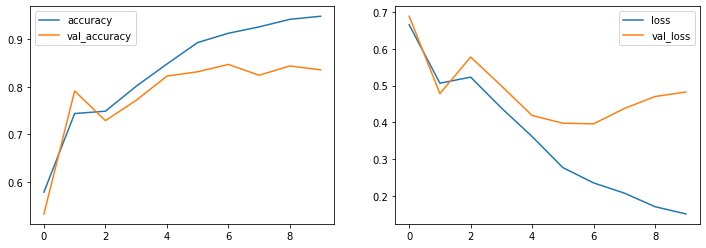

In [9]:
utils.plot_history(history_lstm_2)

In [10]:
model_gru = build_model_gru()
model_gru.summary()
history_gru = model_gru.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=val_dataset)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 144,785
Trainable params: 144,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 53s 135ms/step - loss: 0.5773 - accuracy: 0.6763 - val_loss: 0.4723 - val_accuracy: 0.7841
Epoch 2/10
391/391 [==============================] - 52s 134ms/step - loss: 0.3574 - accuracy: 0.852

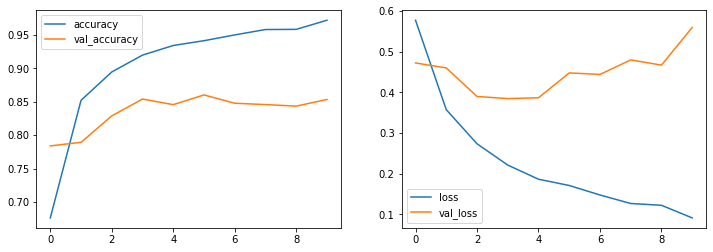

In [11]:
utils.plot_history(history_gru)

In [12]:
model_conv1d = build_model_conv1d()
model_conv1d.summary()
history_conv1d = model_conv1d.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=val_dataset)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 149,649
Trainable params: 149,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 0.4942 - accuracy: 0.7428 - val_loss: 

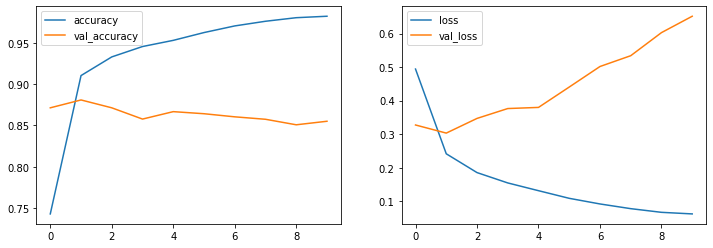

In [13]:
utils.plot_history(history_conv1d)